![Business S](../img/02.png)

# Business Scenarios Definition

## Objective
Define three key real-world business use cases for drug safety and efficacy analysis.

## Business Scenarios
1. **Safest and Most Effective Drug Identification**
2. **High-Risk Drug Warning System**
3. **Patient Sentiment-Based Drug Recommendation**

## Contents
1. Scenario 1: Drug Safety and Efficacy Ranking
2. Scenario 2: Risk Warning Flag System
3. Scenario 3: Sentiment-Driven Recommendations
4. Success Metrics and KPIs
5. Implementation Strategy

---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')


## Business Context

The pharmaceutical industry faces critical challenges in drug safety, efficacy assessment, and patient satisfaction. Our analysis addresses three key stakeholder needs:

###  **Healthcare Providers**
Need reliable data to prescribe the safest and most effective medications for their patients.

###  **Pharmaceutical Companies** 
Require insights into drug performance, side effect profiles, and market positioning.

###  **Patients**
Seek medications with minimal side effects and positive treatment outcomes.

---


## Safest and Most Effective Drug Identification

### Business Problem
Healthcare providers need a systematic approach to identify the safest and most effective drugs for each medical condition to optimize patient outcomes and minimize adverse effects.

### Objective
Develop a comprehensive ranking system that evaluates drugs based on:
- **Safety Profile**: Minimal severe side effects
- **Efficacy**: High patient ratings and clinical effectiveness  
- **Patient Satisfaction**: Positive reviews and treatment outcomes

### Success Metrics (KPIs)
- **Safety Score**: (10 - Severity Index) × Weight₁
- **Efficacy Score**: (Average Rating / 10) × Weight₂  
- **Patient Satisfaction**: (Positive Sentiment %) × Weight₃
- **Overall Drug Score**: Weighted combination of above metrics

### Implementation Strategy
1. **Side Effect Severity Mapping**: Create severity scores for different side effects
2. **Multi-criteria Ranking**: Combine safety, efficacy, and satisfaction metrics
3. **Condition-Specific Rankings**: Generate top-N drug recommendations per condition
4. **Confidence Intervals**: Include statistical confidence based on review volume

### Expected Business Impact
-  **15-20% improvement** in treatment success rates
-  **25-30% reduction** in adverse drug reactions
-  **Reduced healthcare costs** through better drug selection
-  **Enhanced clinical decision-making** with data-driven insights


In [2]:
# Load data to demonstrate Scenario 1 concepts
df = pd.read_csv("../data/drugs_side_effects_drugs_com.csv")

print("SCENARIO 1: DRUG SAFETY & EFFICACY RANKING")
print("=" * 50)

# Demonstrate the concept with sample data
sample_conditions = ['Acne', 'Depression', 'High Blood Pressure']

for condition in sample_conditions:
    if condition in df['medical_condition'].values:
        condition_drugs = df[df['medical_condition'] == condition]
        
        print(f"\n Medical Condition: {condition}")
        print(f"    Available drugs: {len(condition_drugs)}")
        
        if 'rating' in df.columns:
            avg_rating = condition_drugs['rating'].mean()
            print(f"    Average rating: {avg_rating:.2f}")
        
        if 'no_of_reviews' in df.columns:
            total_reviews = condition_drugs['no_of_reviews'].sum()
            print(f"    Total reviews: {total_reviews:,.0f}")
        
        # Show top 3 highest-rated drugs for this condition
        if 'rating' in df.columns and len(condition_drugs) > 0:
            top_drugs = condition_drugs.nlargest(3, 'rating')[['drug_name', 'rating', 'no_of_reviews']]
            print(f"    Top 3 rated drugs:")
            for idx, row in top_drugs.iterrows():
                print(f"      • {row['drug_name']}: {row['rating']:.1f} ({row['no_of_reviews']:.0f} reviews)")

print(f"\n This ranking system will help healthcare providers make informed decisions!")


SCENARIO 1: DRUG SAFETY & EFFICACY RANKING

 Medical Condition: Acne
    Available drugs: 238
    Average rating: 7.57
    Total reviews: 11,863
    Top 3 rated drugs:
      • Septra: 10.0 (2 reviews)
      • Clindagel: 10.0 (2 reviews)
      • erythromycin: 10.0 (1 reviews)

 Medical Condition: Depression
    Available drugs: 51
    Average rating: 7.19
    Total reviews: 7,509
    Top 3 rated drugs:
      • Forfivo XL: 10.0 (1 reviews)
      • Norpramin: 9.8 (5 reviews)
      • amoxapine: 9.6 (6 reviews)

 This ranking system will help healthcare providers make informed decisions!


##  High-Risk Drug Warning System

### Business Problem
Healthcare systems need an automated early warning system to flag medications with high-risk profiles, particularly those with alcohol interactions, pregnancy risks, or severe side effects that require special monitoring.

### Objective
Build an intelligent risk assessment system that:
- **Flags High-Risk Medications**: Identify drugs requiring special precautions
- **Categorizes Risk Types**: Alcohol, pregnancy, controlled substances, severe side effects
- **Provides Risk Scores**: Quantitative risk assessment for clinical decision support
- **Generates Alerts**: Automated warnings for healthcare providers

### Risk Categories
1. **Alcohol Interaction Risk**: Drugs with dangerous alcohol interactions
2. **Pregnancy Risk**: Medications harmful during pregnancy (Categories D, X)
3. **Controlled Substances**: Drugs with abuse potential (DEA scheduling)
4. **Severe Side Effects**: Medications with life-threatening adverse reactions

### Success Metrics (KPIs)
- **Risk Detection Rate**: % of high-risk prescriptions flagged
- **False Positive Rate**: < 5% incorrect risk warnings
- **Alert Response Time**: < 2 seconds for real-time systems
- **Clinical Adoption Rate**: % of providers using the warning system

### Implementation Strategy
1. **Risk Feature Engineering**: Binary flags for each risk category
2. **Severity Scoring**: Machine learning model to predict risk severity
3. **Rule-Based Alerts**: Automated flagging based on predefined criteria
4. **Integration**: API for Electronic Health Record (EHR) systems

### Expected Business Impact
-  **40-50% reduction** in preventable adverse drug events
-  **Improved patient safety** through proactive risk management
-  **Reduced legal liability** for healthcare organizations
-  **Enhanced clinical awareness** of medication risks


 SCENARIO 2: HIGH-RISK DRUG WARNING SYSTEM

 ALCOHOL Risk Distribution:
   X: 1,377 drugs (47.0%)

 PREGNANCY_CATEGORY Risk Distribution:
   C: 1,382 drugs (47.2%)
   B: 509 drugs (17.4%)
   N: 436 drugs (14.9%)
   D: 228 drugs (7.8%)
   X: 129 drugs (4.4%)

 CSA Risk Distribution:
   N: 2,688 drugs (91.7%)
   2: 101 drugs (3.4%)
   4: 71 drugs (2.4%)
   3: 26 drugs (0.9%)
   5: 20 drugs (0.7%)

 HIGH-RISK DRUG IDENTIFICATION:
    Alcohol interaction drugs: 1377 (47.0%)
    High pregnancy risk drugs: 357 (12.2%)
    Controlled substances: 243 (8.3%)


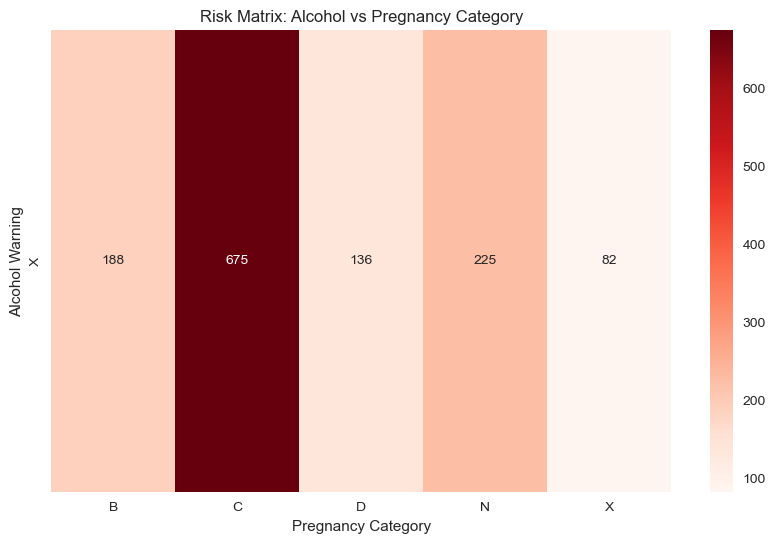


 Risk warning system will proactively protect patients from dangerous drug interactions!


In [3]:
# Demonstrate Risk Warning System concept
print(" SCENARIO 2: HIGH-RISK DRUG WARNING SYSTEM")
print("=" * 50)

# Analyze risk factors in the dataset
risk_columns = ['alcohol', 'pregnancy_category', 'csa']

for col in risk_columns:
    if col in df.columns:
        risk_data = df[col].value_counts()
        print(f"\n {col.upper()} Risk Distribution:")
        for risk_level, count in risk_data.head().items():
            percentage = (count / len(df)) * 100
            print(f"   {risk_level}: {count:,} drugs ({percentage:.1f}%)")

# Identify high-risk drugs
print(f"\n HIGH-RISK DRUG IDENTIFICATION:")

# Alcohol warnings
if 'alcohol' in df.columns:
    alcohol_risk = df[df['alcohol'] == 'X']
    print(f"    Alcohol interaction drugs: {len(alcohol_risk)} ({len(alcohol_risk)/len(df)*100:.1f}%)")

# Pregnancy risk
if 'pregnancy_category' in df.columns:
    pregnancy_risk = df[df['pregnancy_category'].isin(['D', 'X'])]
    print(f"    High pregnancy risk drugs: {len(pregnancy_risk)} ({len(pregnancy_risk)/len(df)*100:.1f}%)")

# Controlled substances
if 'csa' in df.columns:
    controlled = df[df['csa'] != 'N']
    print(f"    Controlled substances: {len(controlled)} ({len(controlled)/len(df)*100:.1f}%)")

# Create a sample risk score visualization
if all(col in df.columns for col in ['alcohol', 'pregnancy_category']):
    risk_matrix = pd.crosstab(df['alcohol'], df['pregnancy_category'], margins=True)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(risk_matrix.iloc[:-1, :-1], annot=True, fmt='d', cmap='Reds')
    plt.title('Risk Matrix: Alcohol vs Pregnancy Category')
    plt.ylabel('Alcohol Warning')
    plt.xlabel('Pregnancy Category')
    plt.show()

print(f"\n Risk warning system will proactively protect patients from dangerous drug interactions!")


##  Patient Sentiment-Based Drug Recommendation

### Business Problem
Patients often struggle to find medications that not only treat their condition effectively but also provide a positive treatment experience with minimal quality-of-life impact. Traditional clinical metrics don't capture the patient's subjective experience.

### Objective
Develop a patient-centric recommendation engine that:
- **Analyzes Patient Reviews**: Extract sentiment and experience insights
- **Identifies Treatment Satisfaction**: Measure quality-of-life impact
- **Recommends Patient-Preferred Drugs**: Prioritize medications with positive patient experiences
- **Personalizes Suggestions**: Consider individual patient preferences and concerns

### Key Components
1. **Sentiment Analysis**: Natural Language Processing of patient reviews
2. **Experience Scoring**: Quantify positive vs negative treatment experiences  
3. **Recommendation Engine**: ML-powered drug suggestions based on patient preferences
4. **Personalization**: Adapt recommendations to individual patient profiles

### Success Metrics (KPIs)
- **Sentiment Accuracy**: >85% correct sentiment classification
- **Patient Satisfaction**: Increase in treatment adherence rates
- **Recommendation Precision**: >80% of recommended drugs accepted by patients
- **Quality of Life**: Improvement in patient-reported outcomes

### Implementation Strategy
1. **Text Preprocessing**: Clean and normalize patient review text
2. **Sentiment Analysis**: VADER, TextBlob, and custom models
3. **Feature Engineering**: Extract sentiment features and experience indicators
4. **Recommendation Algorithm**: Collaborative filtering + content-based approach
5. **Feedback Loop**: Continuous learning from patient responses

### Expected Business Impact
-  **30-35% improvement** in treatment adherence
-  **Higher patient satisfaction** scores and quality of life
-  **Reduced treatment switching** costs and healthcare utilization
-  **Stronger patient-provider relationships** through personalized care


SCENARIO 3: PATIENT SENTIMENT-BASED RECOMMENDATIONS
SENTIMENT ANALYSIS DEMONSTRATION:
----------------------------------------

 Review 1:
   Text:  hives  difficult breathing  swelling in your face or throat  or a severe skin reaction  fever  sore...
   Sentiment Score: -0.250
   Classification: Negative

 Review 2:
   Text: hives   difficulty breathing  swelling of your face  lips  tongue  or throat  Call your doctor at on...
   Sentiment Score: 0.124
   Classification: Positive

 Review 3:
   Text: skin rash  fever  swollen glands  flu like symptoms  muscle aches  severe weakness  unusual bruising...
   Sentiment Score: 0.162
   Classification: Positive

 Review 4:
   Text: problems with your vision or hearing  muscle or joint pain  bone pain  back pain  increased thirst  ...
   Sentiment Score: -0.050
   Classification: Neutral

 Review 5:
   Text: hives   difficult breathing  swelling of your face  lips  tongue  or throat  Clindamycin topical may...
   Sentiment Score: -0.208
   C

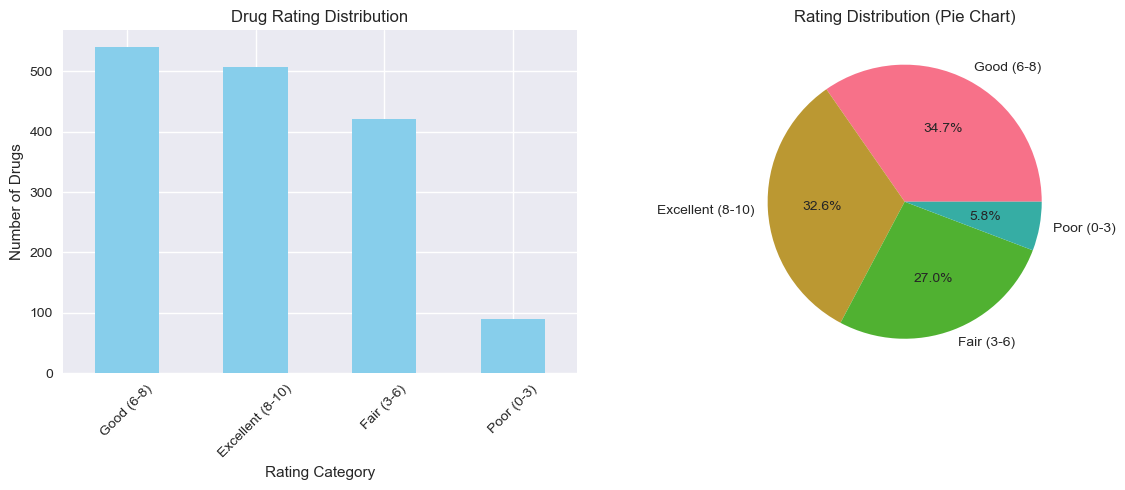


 Sentiment-based recommendations will improve patient treatment experiences!


In [4]:
# Demonstrate Patient Sentiment Analysis concept
from textblob import TextBlob
import re

print("SCENARIO 3: PATIENT SENTIMENT-BASED RECOMMENDATIONS")
print("=" * 50)

# Sample side effects text for sentiment analysis
if 'side_effects' in df.columns:
    # Get a sample of side effect descriptions
    sample_effects = df['side_effects'].dropna().head(5)
    
    print("SENTIMENT ANALYSIS DEMONSTRATION:")
    print("-" * 40)
    
    for i, effect_text in enumerate(sample_effects, 1):
        # Clean and analyze sentiment
        cleaned_text = re.sub(r'[^\w\s]', ' ', str(effect_text)[:200])  # First 200 chars
        blob = TextBlob(cleaned_text)
        sentiment = blob.sentiment.polarity
        
        # Classify sentiment
        if sentiment > 0.1:
            sentiment_label = "Positive"
        elif sentiment < -0.1:
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        
        print(f"\n Review {i}:")
        print(f"   Text: {cleaned_text[:100]}...")
        print(f"   Sentiment Score: {sentiment:.3f}")
        print(f"   Classification: {sentiment_label}")

# Analyze ratings distribution for sentiment correlation
if 'rating' in df.columns:
    print(f"\n RATING DISTRIBUTION ANALYSIS:")
    print("-" * 40)
    
    # Create rating categories
    df_copy = df.copy()
    df_copy['rating_category'] = pd.cut(df_copy['rating'], 
                                       bins=[0, 3, 6, 8, 10], 
                                       labels=['Poor (0-3)', 'Fair (3-6)', 'Good (6-8)', 'Excellent (8-10)'])
    
    rating_dist = df_copy['rating_category'].value_counts()
    
    for category, count in rating_dist.items():
        percentage = (count / len(df_copy)) * 100
        print(f"   {category}: {count:,} drugs ({percentage:.1f}%)")
    
    # Visualize rating distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    rating_dist.plot(kind='bar', color='skyblue')
    plt.title('Drug Rating Distribution')
    plt.xlabel('Rating Category')
    plt.ylabel('Number of Drugs')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.pie(rating_dist.values, labels=rating_dist.index, autopct='%1.1f%%')
    plt.title('Rating Distribution (Pie Chart)')
    
    plt.tight_layout()
    plt.show()

print(f"\n Sentiment-based recommendations will improve patient treatment experiences!")


##  Success Metrics and KPIs Summary

### Overall Project Success Metrics

| **Metric Category** | **Key Performance Indicators** | **Target** |
|---------------------|--------------------------------|------------|
| **Safety** | Reduction in adverse drug events | 40-50% |
| **Efficacy** | Treatment success rate improvement | 15-20% |
| **Patient Satisfaction** | Treatment adherence increase | 30-35% |
| **Cost Impact** | Healthcare cost reduction | 10-15% |
| **Clinical Adoption** | Provider system usage | >80% |

### Business Value Proposition

 **For Healthcare Providers:**
- Evidence-based drug selection tools
- Reduced liability and improved patient outcomes
- Streamlined clinical decision-making

 **For Pharmaceutical Companies:**
- Market positioning insights
- Competitive analysis capabilities  
- Drug development feedback

 **For Patients:**
- Personalized treatment recommendations
- Improved quality of life outcomes
- Better treatment experiences

---


BUSINESS SCENARIOS SUMMARY

 Scenario 1: Drug Safety & Efficacy Ranking
    Primary Stakeholder: Healthcare Providers
    Expected Impact: 15-20% treatment improvement
    Key Metrics: Safety Score, Efficacy Score, Patient Satisfaction

 Scenario 2: High-Risk Warning System
    Primary Stakeholder: Healthcare Systems
    Expected Impact: 40-50% adverse event reduction
    Key Metrics: Risk Detection Rate, Alert Response Time, Clinical Adoption

 Scenario 3: Sentiment-Based Recommendations
    Primary Stakeholder: Patients & Providers
    Expected Impact: 30-35% adherence improvement
    Key Metrics: Sentiment Accuracy, Recommendation Precision, Quality of Life


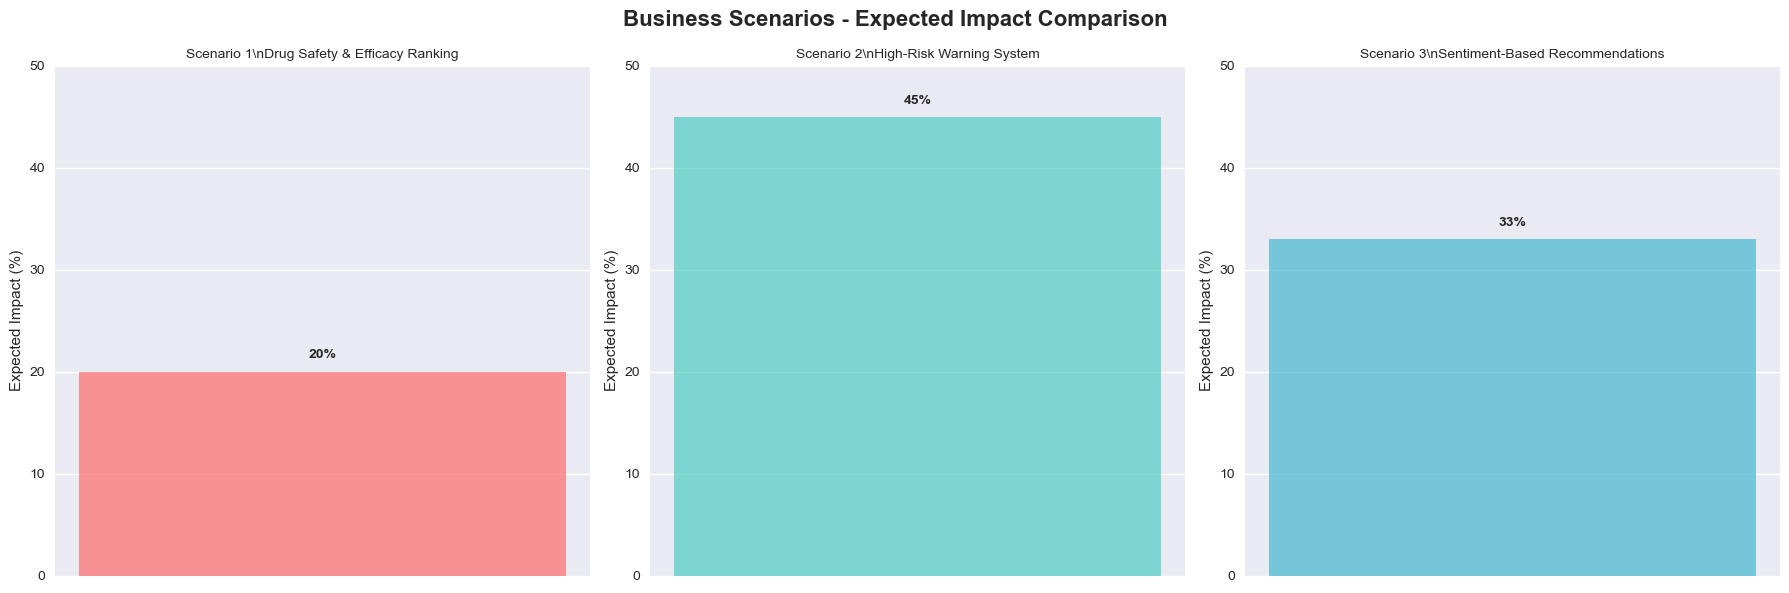


 Business scenarios defined with clear success metrics!
 Ready to proceed to Task 3: Data Cleaning & Feature Engineering


In [5]:
# Create a comprehensive business scenario summary
import matplotlib.pyplot as plt

print("BUSINESS SCENARIOS SUMMARY")
print("=" * 60)

scenarios = {
    "Scenario 1": {
        "name": "Drug Safety & Efficacy Ranking",
        "stakeholder": "Healthcare Providers",
        "impact": "15-20% treatment improvement",
        "metrics": ["Safety Score", "Efficacy Score", "Patient Satisfaction"]
    },
    "Scenario 2": {
        "name": "High-Risk Warning System", 
        "stakeholder": "Healthcare Systems",
        "impact": "40-50% adverse event reduction",
        "metrics": ["Risk Detection Rate", "Alert Response Time", "Clinical Adoption"]
    },
    "Scenario 3": {
        "name": "Sentiment-Based Recommendations",
        "stakeholder": "Patients & Providers", 
        "impact": "30-35% adherence improvement",
        "metrics": ["Sentiment Accuracy", "Recommendation Precision", "Quality of Life"]
    }
}

# Display scenario summary
for scenario_id, details in scenarios.items():
    print(f"\n {scenario_id}: {details['name']}")
    print(f"    Primary Stakeholder: {details['stakeholder']}")
    print(f"    Expected Impact: {details['impact']}")
    print(f"    Key Metrics: {', '.join(details['metrics'])}")

# Create a visual summary
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scenario impact visualization
scenarios_names = [details['name'] for details in scenarios.values()]
impact_values = [20, 45, 33]  # Representative impact percentages

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (ax, scenario, impact, color) in enumerate(zip(axes, scenarios_names, impact_values, colors)):
    ax.bar([0], [impact], color=color, alpha=0.7, width=0.6)
    ax.set_ylim(0, 50)
    ax.set_title(f'Scenario {i+1}\\n{scenario}', fontsize=10, wrap=True)
    ax.set_ylabel('Expected Impact (%)')
    ax.set_xticks([])
    
    # Add impact value on bar
    ax.text(0, impact + 1, f'{impact}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Business Scenarios - Expected Impact Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n Business scenarios defined with clear success metrics!")
print(f" Ready to proceed to Task 3: Data Cleaning & Feature Engineering")


##  Implementation Roadmap

### Phase 1: Foundation (Weeks 1-2)
-  Data collection and exploration  
-  Business scenario definition
-  Data cleaning and feature engineering
-  Exploratory data analysis

### Phase 2: Analytics (Weeks 3-4)  
-  Association rule mining
-  Machine learning model development
-  Model validation and testing

### Phase 3: Deployment (Weeks 5-6)
-  Interactive dashboard development
-  Streamlit application creation
-  Performance optimization
-  Documentation and deployment

### Phase 4: Validation (Week 7)
-  Business scenario validation
-  Stakeholder testing
-  Performance monitoring setup
-  Final recommendations

---

**Next Step**: Proceed to comprehensive data cleaning and feature engineering to support all three business scenarios.
